In [18]:
import sys 
sys.path.append('/home/haroldvaz/computacional/lib/python3.8/site-packages')

In [19]:
import numpy as np
import matplotlib.pyplot as plt

### 1. **Un filtro pasa bajos**
$$\frac{d V_{out}}{dt}=\frac{1}{RC}(V_{in}(t)-V_{out})$$
**a)**


In [14]:
# Primero definimos las funciones
from math import floor

def Vin(t):
    if floor(2*t) % 2 == 0:
        return 1
    if floor(2*t) % 2 != 0:
        return -1

def f(V,RC,t):
    return (1/(RC))*(Vin(t)-V)

1) Método de Euler:

In [16]:
# Metodo de Euler
def Euler1D(f,x0,RC,t0,tf,dt):
    
    T=[]
    X=[]

    T.append(t0)
    X.append(x0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,RC,t)*dt
        t = t + dt
        X.append(x)
        T.append(t)
  
    return X,T



In [34]:
V1,T = Euler1D(f,0,0.01,0,10,0.0001)

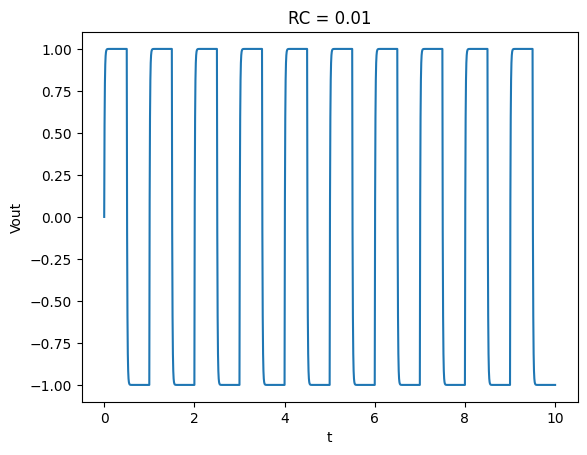

In [39]:
plt.plot(T,V1)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.01');

In [51]:
V2,T = Euler1D(f,0,0.1,0,10,0.00001)

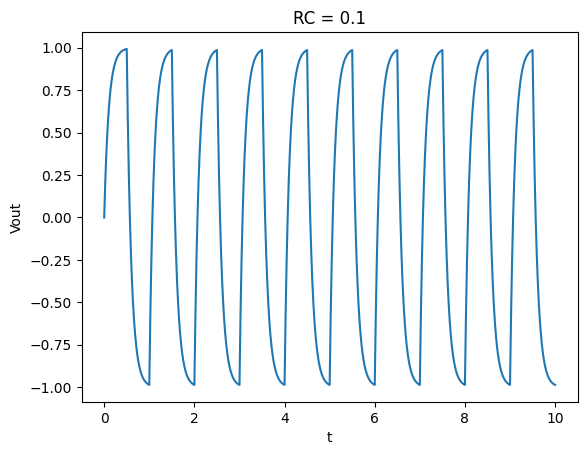

In [52]:
plt.plot(T,V2)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.1');

In [49]:
V3,T = Euler1D(f,0,1,0,10,0.00001)

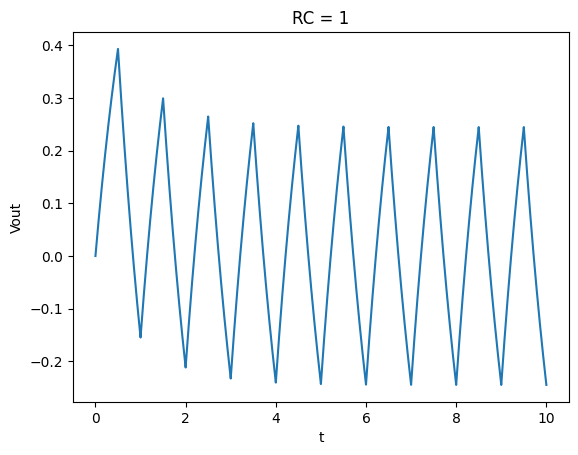

In [50]:
plt.plot(T,V3)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 1');

2) Método de Runge-Kutta

In [54]:
def RungeKutta4_1D(f,x0,RC,t0,tf,h):
    
    T=[]
    X=[]

    T.append(t0)
    X.append(x0)

    t=t0
    x=x0

    while (t<tf):
        
        k1 = f(x,RC,t)*h
        k2 = f(x+(k1/2),RC,t+(h/2))*h
        k3 = f(x+(k2/2),RC,t+(h/2))*h
        k4 = f(x+k3,RC,t+h)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6
        t = t + h
        
        X.append(x)
        T.append(t)
  
    return X,T

In [57]:
V1,T = RungeKutta4_1D(f,0,0.01,0,10,0.001)

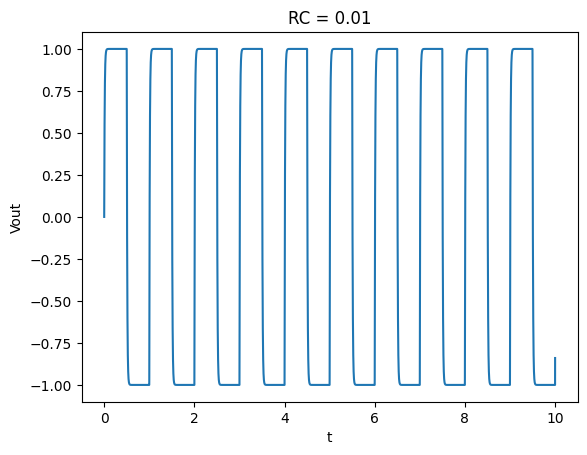

In [58]:
plt.plot(T,V1)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.01');

In [59]:
V2,T = RungeKutta4_1D(f,0,0.1,0,10,0.001)

plt.plot(T,V2)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.1');

In [61]:
V3,T = RungeKutta4_1D(f,0,1,0,10,0.001)

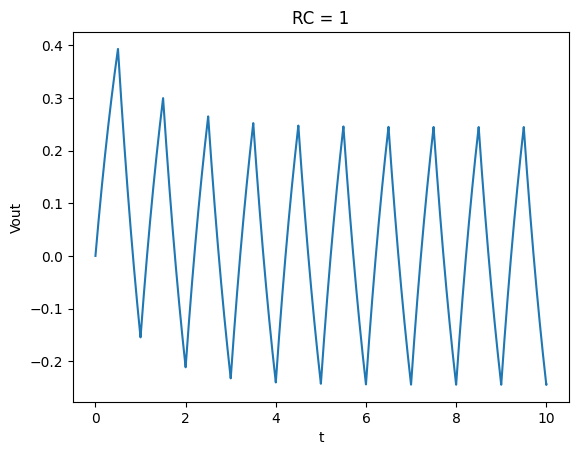

In [62]:
plt.plot(T,V3)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 1');

**b)**

**c)** La principal diferencia es que para obtener resultados similares, la h utilizada en el método de Euler es mucho más pequeña que la utilizada en el método de Runge-Kutta. Como sabemos a manera que la h es más pequeña el programa tarda más en ejecutarse, por lo que podemos decir que otra de las diferencias es el tiempo de ejecución.

### 2. **El modelo de Lotka-Volterra (predador-presa)**

$$\dfrac{dx}{dt} = \alpha x-\beta xy,$$
$$\dfrac{dy}{dt} = \gamma xy-\delta y.$$